# Initial Scraping Data Code

In [2]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load needed libraries
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time

In [4]:
# Setup Selenium WebDriver
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
driver = webdriver.Chrome(service=Service(), options=options)

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta

# 1. Generate all the Saturdays from Jan 4, 2025 to today
start_date = datetime(2025, 1, 4)  # First Saturday of January 2025
end_date = datetime.today()

dates = []
current_date = start_date
while current_date <= end_date:
    dates.append(current_date.strftime('%Y-%m-%d'))
    current_date += timedelta(weeks=1)

# 2. Function to scrape a single week
def scrape_billboard_week(date):
    url = f"https://www.billboard.com/charts/hot-100/{date}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    songs = []
    chart_list = soup.select('li.o-chart-results-list__item h3')

    if not chart_list:  # if no songs found, page might not exist
        print(f"No chart found for {date}.")
        return []

    titles = soup.select('li.o-chart-results-list__item h3')
    artists = soup.select('li.o-chart-results-list__item span.c-label.a-no-trucate')
    ranks = soup.select('li.o-chart-results-list__item span.c-label.a-font-primary-bold-l')

    for rank, title, artist in zip(ranks, titles, artists):
        song_title = title.get_text(strip=True)
        artist_name = artist.get_text(strip=True)
        song_rank = rank.get_text(strip=True)

        songs.append({'date': date, 'rank': song_rank, 'title': song_title, 'artist': artist_name})

    return songs
      

In [6]:

# 3. Loop through all weeks
all_songs = []

for date in dates:
    try:
        weekly_songs = scrape_billboard_week(date)
        if weekly_songs:
            all_songs.extend(weekly_songs)
            print(f"Scraped {date} with {len(weekly_songs)} songs.")
    except Exception as e:
        print(f"Failed to scrape {date}: {e}")

# 4. Save to a CSV
df = pd.DataFrame(all_songs)
df.to_csv('billboard_hot100_from_jan2025.csv', index=False)

print("Done! Saved all data to 'billboard_hot100_from_jan2025.csv'.")


Scraped 2025-01-04 with 100 songs.
Scraped 2025-01-11 with 100 songs.
Scraped 2025-01-18 with 100 songs.
Scraped 2025-01-25 with 100 songs.
Scraped 2025-02-01 with 100 songs.
Scraped 2025-02-08 with 100 songs.
Scraped 2025-02-15 with 100 songs.
Scraped 2025-02-22 with 100 songs.
Scraped 2025-03-01 with 100 songs.
Scraped 2025-03-08 with 100 songs.
Scraped 2025-03-15 with 100 songs.
Scraped 2025-03-22 with 100 songs.
Scraped 2025-03-29 with 100 songs.
Scraped 2025-04-05 with 100 songs.
Scraped 2025-04-12 with 100 songs.
Scraped 2025-04-19 with 100 songs.
Scraped 2025-04-26 with 100 songs.
Scraped 2025-05-03 with 100 songs.
Done! Saved all data to 'billboard_hot100_from_jan2025.csv'.


In [7]:
display(df)

,date,rank,title,artist
0,2025-01-04,1,All I Want For Christmas Is You,Mariah Carey
1,2025-01-04,1,Rockin' Around The Christmas Tree,Brenda Lee
2,2025-01-04,1,Last Christmas,Wham!
3,2025-01-04,71,Jingle Bell Rock,Bobby Helms
4,2025-01-04,1,Santa Tell Me,Ariana Grande
...,...,...,...,...
1795,2025-05-03,90,Actin Up,Tommy Richman
1796,2025-05-03,91,Tattoo,Tito Double P
1797,2025-05-03,92,House Again,Hudson Westbrook
1798,2025-05-03,93,like JENNIE,JENNIE


# Integration

In [9]:
import pandas as pd
from thefuzz import fuzz
from thefuzz import process

# Load your datasets
billboard = pd.read_csv("billboard_hot100_from_jan2025.csv")
spotify = pd.read_csv("universal_top_spotify_songs.csv")
spotify

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",1,0,0,NaN,4/2/2025,88,False,...,6,-7.727,0,0.0317,0.2890,0.000000,0.1260,0.498,157.964,3
1,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,2,1,1,NaN,4/2/2025,99,False,...,2,-10.171,1,0.0358,0.2000,0.060800,0.1170,0.438,104.978,4
2,2RkZ5LkEzeHGRsmDqKwmaJ,Ordinary,Alex Warren,3,1,47,NaN,4/2/2025,73,False,...,2,-6.141,1,0.0600,0.7040,0.000007,0.0550,0.391,168.115,3
3,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"ROSÉ, Bruno Mars",4,-2,-2,NaN,4/2/2025,92,False,...,0,-4.477,0,0.2600,0.0283,0.000000,0.3550,0.939,149.027,4
4,2CGNAOSuO1MEFCbBRgUzjd,luther (with sza),"Kendrick Lamar, SZA",5,1,0,NaN,4/2/2025,94,False,...,2,-7.546,1,0.1250,0.2510,0.000000,0.2480,0.576,138.008,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,6tbEF9YpayX9uqAA5ezx1j,Nārnija,"OLAS, Esmeralda, heywhosthatkid",10,0,0,LV,6/7/2024,50,True,...,6,-3.433,0,0.0665,0.2420,0.000000,0.2220,0.563,124.950,4
1048571,7iabz12vAuVQYyekFIWJxD,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",11,0,2,LV,6/7/2024,88,True,...,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113,4
1048572,6AI3ezQ4o3HUoP6Dhudph3,Not Like Us,Kendrick Lamar,12,0,-5,LV,6/7/2024,97,True,...,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061,4
1048573,48lxT5qJF0yYyf2z4wB4xW,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",13,2,7,LV,6/7/2024,90,False,...,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019,4


In [10]:
billboard.rename(columns={
    'title': 'track_name',
    'artist': 'artist'
}, inplace=True)

# Normalize text fields for consistent matching
billboard['track_name'] = billboard['track_name'].str.lower().str.strip()
billboard['artist'] = billboard['artist'].str.lower().str.strip()

spotify['name'] = spotify['name'].str.lower().str.strip()
spotify['artists'] = spotify['artists'].str.lower().str.strip()

# Extract primary artist from Spotify artist list, safely
spotify['primary_artist'] = spotify['artists'].apply(lambda x: str(x).split(',')[0].strip())
spotify = spotify[spotify['primary_artist'] != 'nan']  # filter out bad rows

# Fuzzy matching
matched_rows = []

for idx, row in billboard.iterrows():
    bb_title = row['track_name']
    bb_artist = row['artist']

    # Try to filter Spotify 
    artist_keyword = bb_artist.split()[0]
    subset = spotify[spotify['primary_artist'].str.contains(artist_keyword, na=False)]

    if not subset.empty:
        try:
            result = process.extractOne(bb_title, subset['name'], scorer=fuzz.token_sort_ratio)
            if result:
                match_title = result[0]
                score = result[1]
                if score >= 50:
                    match_row = subset[subset['name'] == match_title].iloc[0]
                    combined = {**row.to_dict(), **match_row.to_dict()}
                    matched_rows.append(combined)
        except Exception as e:
            print(f"Error matching '{bb_title}' by '{bb_artist}': {e}")

# Create final DataFrame
merged_df = pd.DataFrame(matched_rows)

# Export merged results
merged_df.to_csv("Cleaned_Merged_Billboard_Spotify.csv", index=False)

# summary
print(f" Successfully merged {merged_df.shape[0]} songs.")
display(merged_df.head())

 Successfully merged 1405 songs.


,date,rank,track_name,artist,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,primary_artist
0,2025-01-04,1,all i want for christmas is you,mariah carey,0bYg9bo50gSsH3LtXe2SQn,all i want for christmas is you,mariah carey,14,0,-4,...,-7.463,1,0.0384,0.1640,0.000000,0.0708,0.350,150.273,4,mariah carey
1,2025-01-04,1,rockin' around the christmas tree,brenda lee,2EjXfH91m7f8HiJN1yQg97,rockin' around the christmas tree,brenda lee,45,-10,-29,...,-8.744,1,0.0496,0.6170,0.000000,0.5050,0.879,67.086,4,brenda lee
2,2025-01-04,1,last christmas,wham!,2FRnf9qhLbvw8fu4IBXx78,last christmas,wham!,29,-22,-20,...,-12.472,1,0.0293,0.1890,0.000002,0.3550,0.947,107.682,4,wham!
3,2025-01-04,71,jingle bell rock,bobby helms,7vQbuQcyTflfCIOu3Uzzya,jingle bell rock,bobby helms,37,-4,-20,...,-8.463,1,0.0363,0.6430,0.000000,0.0652,0.806,119.705,4,bobby helms
4,2025-01-04,1,santa tell me,ariana grande,0lizgQ7Qw35od7CYaoMBZb,santa tell me,ariana grande,48,-15,-42,...,-7.364,1,0.1170,0.0489,0.000000,0.2910,0.592,191.868,4,ariana grande


In [11]:
merged_df

,date,rank,track_name,artist,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,primary_artist
0,2025-01-04,1,all i want for christmas is you,mariah carey,0bYg9bo50gSsH3LtXe2SQn,all i want for christmas is you,mariah carey,14,0,-4,...,-7.463,1,0.0384,0.1640,0.000000,0.0708,0.350,150.273,4,mariah carey
1,2025-01-04,1,rockin' around the christmas tree,brenda lee,2EjXfH91m7f8HiJN1yQg97,rockin' around the christmas tree,brenda lee,45,-10,-29,...,-8.744,1,0.0496,0.6170,0.000000,0.5050,0.879,67.086,4,brenda lee
2,2025-01-04,1,last christmas,wham!,2FRnf9qhLbvw8fu4IBXx78,last christmas,wham!,29,-22,-20,...,-12.472,1,0.0293,0.1890,0.000002,0.3550,0.947,107.682,4,wham!
3,2025-01-04,71,jingle bell rock,bobby helms,7vQbuQcyTflfCIOu3Uzzya,jingle bell rock,bobby helms,37,-4,-20,...,-8.463,1,0.0363,0.6430,0.000000,0.0652,0.806,119.705,4,bobby helms
4,2025-01-04,1,santa tell me,ariana grande,0lizgQ7Qw35od7CYaoMBZb,santa tell me,ariana grande,48,-15,-42,...,-7.364,1,0.1170,0.0489,0.000000,0.2910,0.592,191.868,4,ariana grande
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,2025-05-03,80,gimme a hug,drake,5Nz7hI3cCOHmMR4vSLJ1An,gimme a hug,drake,48,-5,-22,...,-5.530,1,0.0979,0.0643,0.000000,0.0772,0.245,142.950,4,drake
1401,2025-05-03,84,call me when you break up,"selena gomez, benny blanco & gracie abrams",4yFPKNzjkCS0PpRzhcvy1d,call me when you break up (with gracie abrams),"selena gomez, benny blanco, gracie abrams",47,3,-16,...,-5.006,1,0.1290,0.3730,0.000043,0.0535,0.853,148.008,4,selena gomez
1402,2025-05-03,88,nuevayol,bad bunny,5TFD2bmFKGhoCRbX61nXY5,nuevayol,bad bunny,32,-1,0,...,-20.024,1,0.1390,0.2650,0.995000,0.2040,0.120,137.922,4,bad bunny
1403,2025-05-03,91,tattoo,tito double p,3KgHiAVuP88QoQs9CO4z1P,tattoo,tito double p,21,-2,0,...,-4.278,0,0.0656,0.4820,0.000005,0.0853,0.463,109.897,3,tito double p


In [12]:
# Convert dataframe to CSV
merged_df.to_csv("Merged_billboard_hot_100_spotify.csv", index=False)

# Cleaning

In [14]:
import pandas as pd

# Load the merged dataset
df = pd.read_csv("Merged_billboard_hot_100_spotify.csv")

# Step 1: Drop full duplicates
df = df.drop_duplicates()

# Step 2: Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 3: Clean text columns (lowercase and strip spaces)
text_columns = ['track_name', 'name', 'artist', 'artists', 'primary_artist']
for col in text_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower().str.strip()

# Step 4: Combine and overwrite song title
df['title'] = df.apply(
    lambda row: f"{row['track_name']} / {row['name']}" if row['track_name'] != row['name'] else row['track_name'],
    axis=1
)

# Step 5: Combine and overwrite artist
df['artist_combined'] = df.apply(
    lambda row: f"{row['artist']} / {row['artists']}" if row['artist'] != row['artists'] else row['artist'],
    axis=1
)

# Step 6: Drop original duplicate columns
df = df.drop(columns=['track_name', 'name', 'artist', 'artists'])

# Step 7: Drop duplicate songs based on title
df = df.drop_duplicates(subset=['title'])

# Step 8: Reorder columns (title and artist_combined first)
columns = ['title', 'artist_combined'] + [col for col in df.columns if col not in ['title', 'artist_combined']]
df = df[columns]

# Step 9: Save cleaned file
df.to_csv("Cleaned_Billboard_Spotify_Final.csv", index=False)

# Step 10: Show results
print(f" Cleaned and replaced titles/artists. Final Rows: {df.shape[0]}")
display(df.head())

 Cleaned and replaced titles/artists. Final Rows: 273


,title,artist_combined,date,rank,spotify_id,daily_rank,daily_movement,weekly_movement,country,snapshot_date,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,primary_artist
0,all i want for christmas is you,mariah carey,2025-01-04,1,0bYg9bo50gSsH3LtXe2SQn,14,0,-4,UA,1/2/2025,...,-7.463,1,0.0384,0.1640,0.000000,0.0708,0.350,150.273,4,mariah carey
1,rockin' around the christmas tree,brenda lee,2025-01-04,1,2EjXfH91m7f8HiJN1yQg97,45,-10,-29,UA,1/2/2025,...,-8.744,1,0.0496,0.6170,0.000000,0.5050,0.879,67.086,4,brenda lee
2,last christmas,wham!,2025-01-04,1,2FRnf9qhLbvw8fu4IBXx78,29,-22,-20,UA,1/3/2025,...,-12.472,1,0.0293,0.1890,0.000002,0.3550,0.947,107.682,4,wham!
3,jingle bell rock,bobby helms,2025-01-04,71,7vQbuQcyTflfCIOu3Uzzya,37,-4,-20,UA,1/2/2025,...,-8.463,1,0.0363,0.6430,0.000000,0.0652,0.806,119.705,4,bobby helms
4,santa tell me,ariana grande,2025-01-04,1,0lizgQ7Qw35od7CYaoMBZb,48,-15,-42,LV,12/29/2024,...,-7.364,1,0.1170,0.0489,0.000000,0.2910,0.592,191.868,4,ariana grande


In [15]:
df

,title,artist_combined,date,rank,spotify_id,daily_rank,daily_movement,weekly_movement,country,snapshot_date,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,primary_artist
0,all i want for christmas is you,mariah carey,2025-01-04,1,0bYg9bo50gSsH3LtXe2SQn,14,0,-4,UA,1/2/2025,...,-7.463,1,0.0384,0.1640,0.000000,0.0708,0.350,150.273,4,mariah carey
1,rockin' around the christmas tree,brenda lee,2025-01-04,1,2EjXfH91m7f8HiJN1yQg97,45,-10,-29,UA,1/2/2025,...,-8.744,1,0.0496,0.6170,0.000000,0.5050,0.879,67.086,4,brenda lee
2,last christmas,wham!,2025-01-04,1,2FRnf9qhLbvw8fu4IBXx78,29,-22,-20,UA,1/3/2025,...,-12.472,1,0.0293,0.1890,0.000002,0.3550,0.947,107.682,4,wham!
3,jingle bell rock,bobby helms,2025-01-04,71,7vQbuQcyTflfCIOu3Uzzya,37,-4,-20,UA,1/2/2025,...,-8.463,1,0.0363,0.6430,0.000000,0.0652,0.806,119.705,4,bobby helms
4,santa tell me,ariana grande,2025-01-04,1,0lizgQ7Qw35od7CYaoMBZb,48,-15,-42,LV,12/29/2024,...,-7.364,1,0.1170,0.0489,0.000000,0.2910,0.592,191.868,4,ariana grande
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,morena,"neton vega & peso pluma / neton vega, peso pluma",2025-04-12,87,4oB8Xd7gMlUEtWoD8bmCXW,33,17,17,NaN,4/2/2025,...,-7.409,0,0.0308,0.3790,0.001480,0.3410,0.189,118.007,3,neton vega
1215,azizam / azar azar,ed sheeran / edis,2025-04-19,22,4xdl1mVmS8lwVdwadHXL3A,44,-4,6,TR,10/1/2024,...,-4.494,1,0.1240,0.1760,0.000000,0.2680,0.509,96.968,4,edis
1258,back to me / take me back to la,the marias / the weeknd,2025-04-19,80,3W5Y2d0HB3sgubDAYXGRKn,50,-1,0,CA,2/4/2025,...,-7.580,0,0.0461,0.0721,0.000000,0.0930,0.199,207.924,4,the weeknd
1264,undressed,sombr,2025-04-19,90,4AajxCEwGEsmHmT4H1TwjY,33,0,17,NZ,4/2/2025,...,-3.883,1,0.0406,0.1370,0.000000,0.0829,0.888,115.999,4,sombr


# Analysis

In [17]:
# Import libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Load final dataset
df = pd.read_csv('Cleaned_Billboard_Spotify_Final.csv')
df.head()

,title,artist_combined,date,rank,spotify_id,daily_rank,daily_movement,weekly_movement,country,snapshot_date,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,primary_artist
0,all i want for christmas is you,mariah carey,2025-01-04,1,0bYg9bo50gSsH3LtXe2SQn,14,0,-4,UA,1/2/2025,...,-7.463,1,0.0384,0.1640,0.000000,0.0708,0.350,150.273,4,mariah carey
1,rockin' around the christmas tree,brenda lee,2025-01-04,1,2EjXfH91m7f8HiJN1yQg97,45,-10,-29,UA,1/2/2025,...,-8.744,1,0.0496,0.6170,0.000000,0.5050,0.879,67.086,4,brenda lee
2,last christmas,wham!,2025-01-04,1,2FRnf9qhLbvw8fu4IBXx78,29,-22,-20,UA,1/3/2025,...,-12.472,1,0.0293,0.1890,0.000002,0.3550,0.947,107.682,4,wham!
3,jingle bell rock,bobby helms,2025-01-04,71,7vQbuQcyTflfCIOu3Uzzya,37,-4,-20,UA,1/2/2025,...,-8.463,1,0.0363,0.6430,0.000000,0.0652,0.806,119.705,4,bobby helms
4,santa tell me,ariana grande,2025-01-04,1,0lizgQ7Qw35od7CYaoMBZb,48,-15,-42,LV,12/29/2024,...,-7.364,1,0.1170,0.0489,0.000000,0.2910,0.592,191.868,4,ariana grande


       danceability      energy    loudness     valence       tempo  \
count    273.000000  273.000000  273.000000  273.000000  273.000000   
mean       0.608857    0.596939   -8.272026    0.459184  121.503286   
std        0.162747    0.201580    6.532473    0.254838   29.189125   
min        0.093900    0.001740  -54.341000    0.000010   63.662000   
25%        0.510000    0.478000   -8.744000    0.245000  100.002000   
50%        0.620000    0.637000   -6.538000    0.436000  118.007000   
75%        0.730000    0.735000   -5.152000    0.636000  140.092000   
max        0.974000    0.981000   -2.018000    0.976000  215.338000   

       popularity  
count  273.000000  
mean    76.395604  
std     20.983999  
min      0.000000  
25%     74.000000  
50%     83.000000  
75%     88.000000  
max     99.000000  


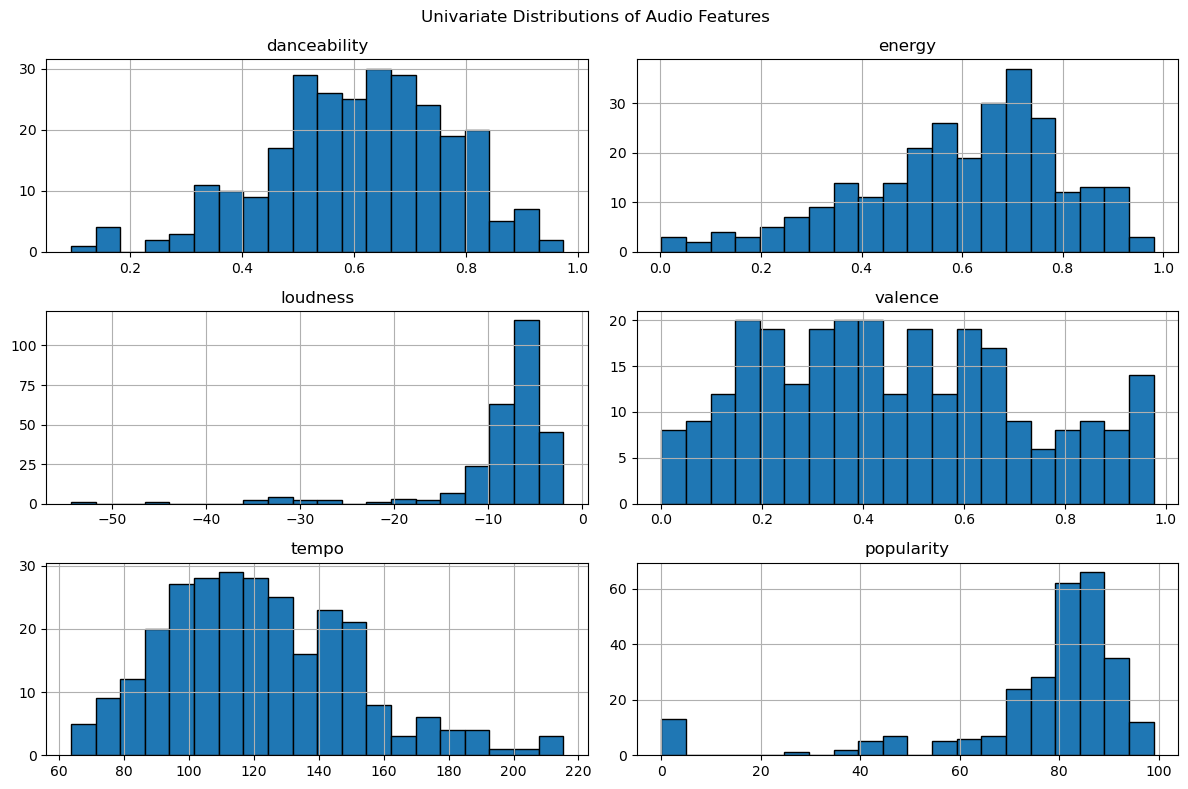

In [19]:
# Descriptive Statistics - Univariate 
features = ['danceability', 'energy', 'loudness', 'valence', 'tempo', 'popularity']
print(df[features].describe())

# Compare Top 10 vs 11-100
df['rank_bin'] = df['rank'].apply(lambda x: 'Top 10' if x <= 10 else '11–100')

df[features].hist(bins=20, edgecolor='black', figsize=(12, 8))
plt.suptitle("Univariate Distributions of Audio Features")
plt.tight_layout()
plt.show()


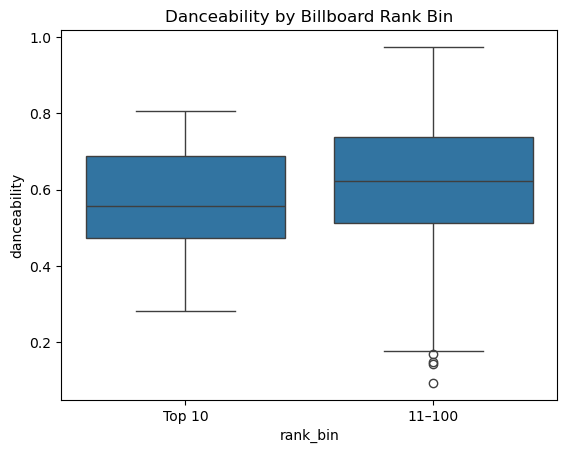

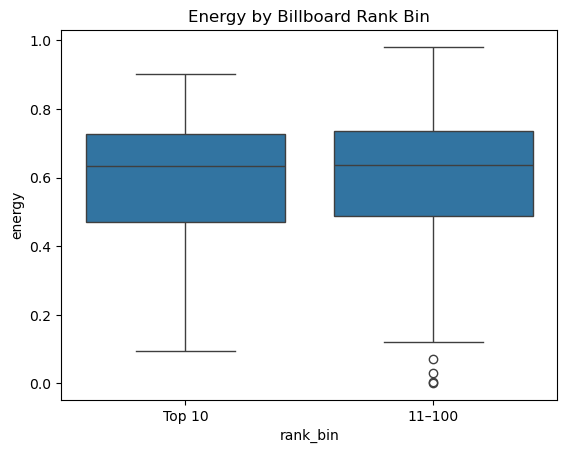

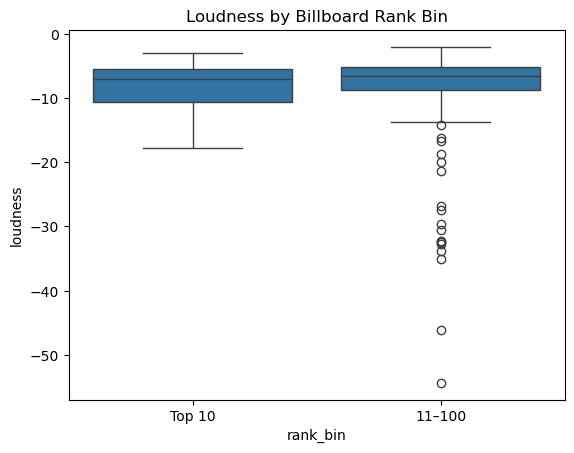

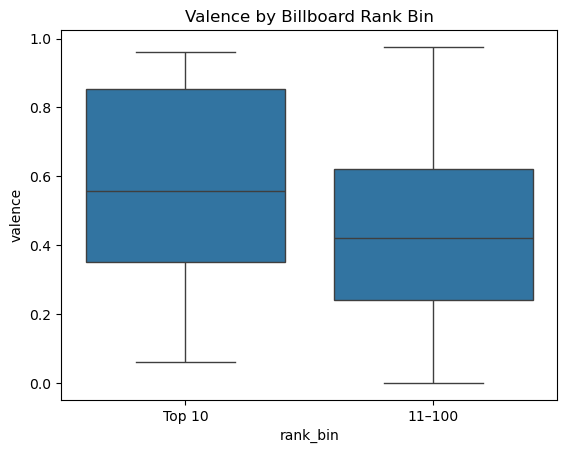

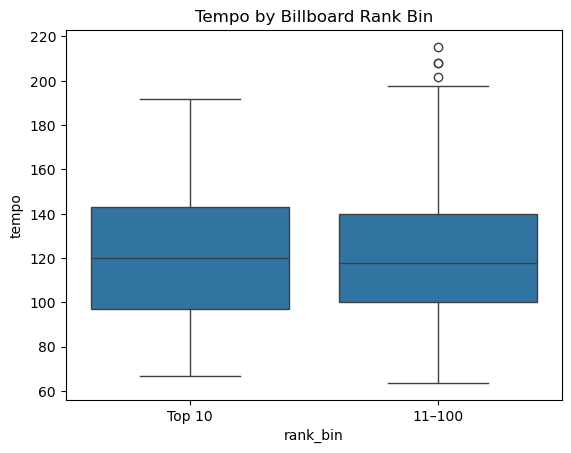

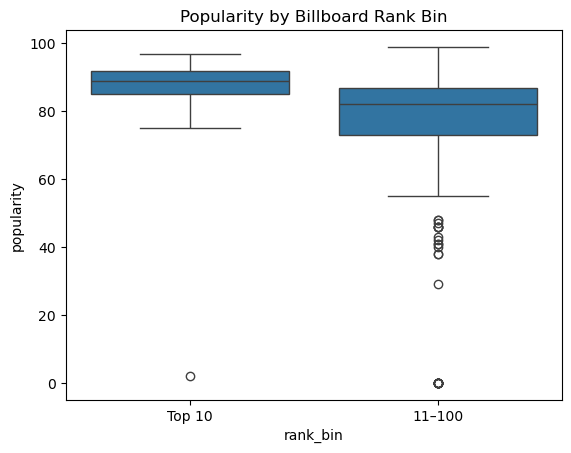

T-test for Valence (Top 10 vs 11–100): t-stat = 1.8594, p-value = 0.0735


In [20]:
# Boxplots for selected features - Bivariate Analysis
for feature in features:
    sns.boxplot(data=df, x='rank_bin', y=feature)
    plt.title(f"{feature.capitalize()} by Billboard Rank Bin")
    plt.show()

# T-test example: valence
top10_val = df[df['rank_bin'] == 'Top 10']['valence']
other_val = df[df['rank_bin'] == '11–100']['valence']
t_stat, p_val = ttest_ind(top10_val, other_val, equal_var=False)
print(f"T-test for Valence (Top 10 vs 11–100): t-stat = {t_stat:.4f}, p-value = {p_val:.4f}")


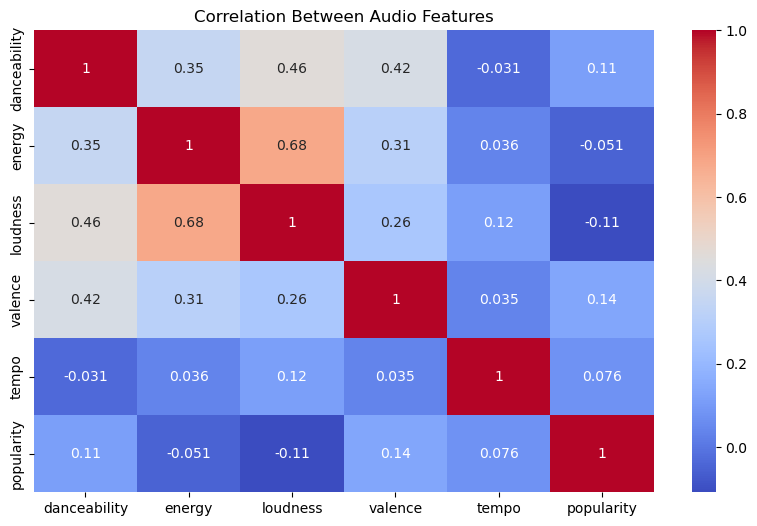

In [21]:
# Correlation Heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Audio Features")
plt.show()

In [22]:
# Machine Learning
X = df[features]
y = df['daily_rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mse, r2))



In [23]:
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R²'])
print(results_df.sort_values(by='R²', ascending=False))


               Model         MSE        R²
3      Random Forest  196.871138  0.015996
2   Lasso Regression  232.651291 -0.162841
1   Ridge Regression  237.412650 -0.186640
0  Linear Regression  239.340889 -0.196277


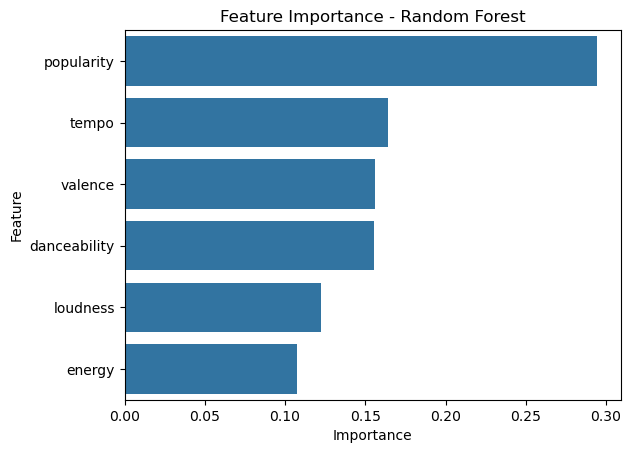

In [24]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - Random Forest")
plt.show()


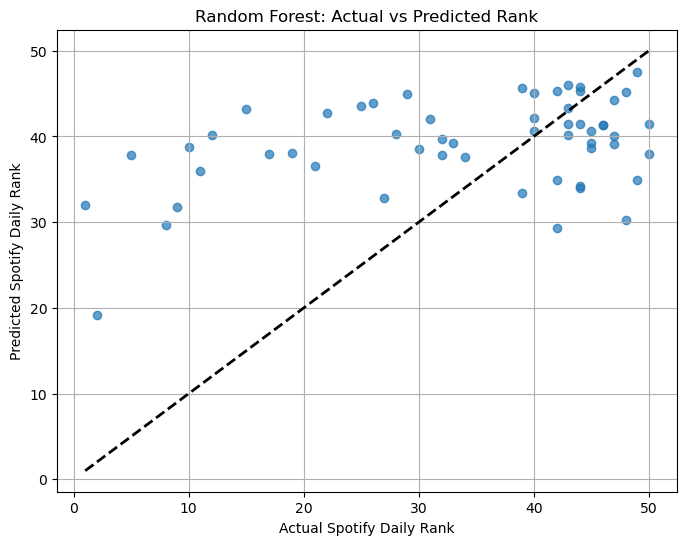

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Spotify Daily Rank")
plt.ylabel("Predicted Spotify Daily Rank")
plt.title("Random Forest: Actual vs Predicted Rank")
plt.grid(True)
plt.show()

